First 5 rows:
    ID  Age   Salary Department  Experience_Years Remote_Work
0   1   56  38392.0         IT               1.0         Yes
1   2   46  60535.0         IT               5.0          No
2   3   32  82256.0    Finance              12.0         Yes
3   4   25  65222.0    Finance              13.0         Yes
4   5   38  93335.0  Marketing               3.0          No

Shape of data: (100, 6)

Null values in each column:
ID                  0
Age                 0
Salary              5
Department          0
Experience_Years    5
Remote_Work         0
dtype: int64

Missing values after imputation:
 ID                  0
Age                 0
Salary              0
Department          0
Experience_Years    0
Remote_Work         0
dtype: int64

Data types:
ID                    int64
Age                   int64
Salary              float64
Department           object
Experience_Years    float64
Remote_Work          object
dtype: object

Descriptive statistics:
                ID  

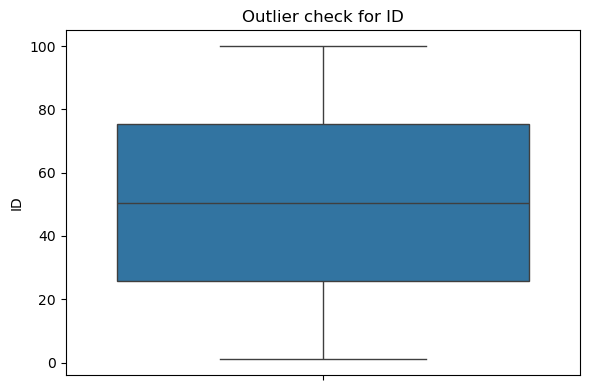

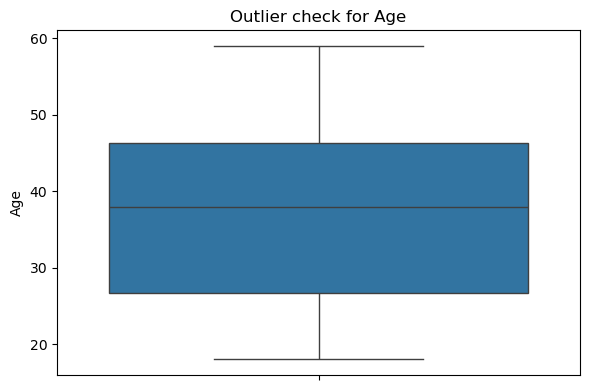

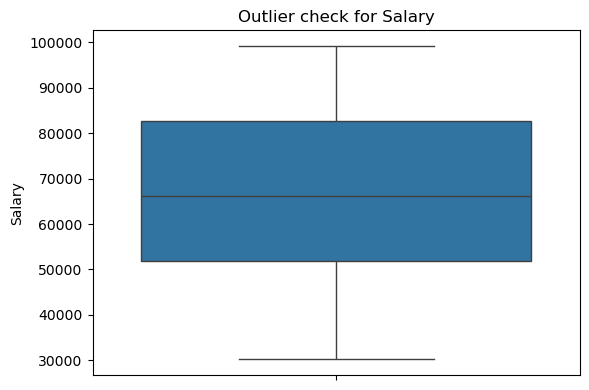

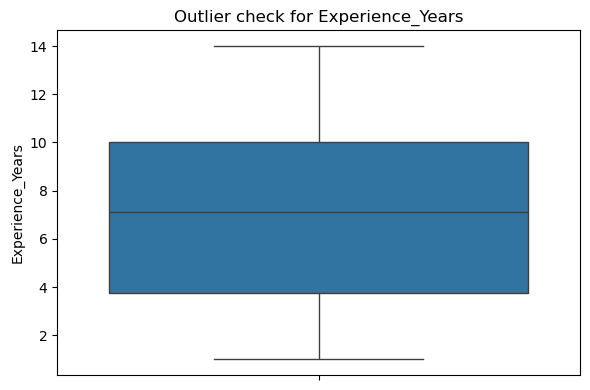


After MinMax Scaling:
         ID       Age    Salary  Experience_Years
0  0.000000  0.926829  0.118712          0.000000
1  0.010101  0.682927  0.439825          0.307692
2  0.020202  0.341463  0.754818          0.846154
3  0.030303  0.170732  0.507795          0.923077
4  0.040404  0.487805  0.915484          0.153846
Original data types:

ID                  float64
Age                 float64
Salary              float64
Department           object
Experience_Years    float64
Remote_Work          object
dtype: object
Converted Department to category.
Converted Remote_Work to category.

Updated data types:

ID                   float64
Age                  float64
Salary               float64
Department          category
Experience_Years     float64
Remote_Work         category
dtype: object

Data after normalization (MinMax Scaling):
         ID       Age    Salary  Experience_Years
0  0.000000  0.926829  0.118712          0.000000
1  0.010101  0.682927  0.439825          0.307692


C:\Users\SAINATH\AppData\Local\Temp\ipykernel_14416\2996687158.py:74: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])  # Try converting to datetime
C:\Users\SAINATH\AppData\Local\Temp\ipykernel_14416\2996687158.py:74: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])  # Try converting to datetime


In [9]:
#Data Wrangling, I Perform the following operations using Python on any
#open source dataset (e.g., data.csv)
#1. Import all the required Python Libraries.
#2. Locate open source data from the web (e.g.,https://www.kaggle.com).
#Provide a clear description of the data and its source (i.e., URL of the
#web site).
#3. Load the Dataset into pandas dataframe.
#4. Data Preprocessing: check for missing values in the data using pandas
#isnull(), describe() function to get some initialstatistics. Provide variable
#descriptions. Types of variables etc. Check the dimensions of the data
#frame.
#5. Data Formatting and Data Normalization: Summarize the types of
#variables by checking the data types (i.e., character, numeric, integer,
#factor, and logical) of the variables in the data set. If variables are not in
#the correct data type, apply proper type conversions.
#6. Turn categorical variables into quantitative variables in Python.


# 1. Import necessary libraries for data manipulation, visualization, and preprocessing
import pandas as pd               # For handling dataframes and CSV files
import numpy as np                # For numerical operations like mean, arrays, etc.
import seaborn as sns             # For visualization (especially statistical plots)
import matplotlib.pyplot as plt   # For general-purpose plotting
from sklearn.preprocessing import MinMaxScaler  # For scaling features between 0 and 1

# 2. Load dataset from a CSV file
df = pd.read_csv("data.csv")      # Load the CSV file named 'data.csv' into DataFrame 'df'
print("First 5 rows:\n", df.head())  # Display the first 5 rows of the dataset
print("\nShape of data:", df.shape)  # Print the number of rows and columns

# 3. Check for missing values
print("\nNull values in each column:")   # Print statement for clarity
print(df.isnull().sum())                 # Show total missing values per column

# Handle missing values in 'Salary' and 'Experience_Years' columns by replacing with mean
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())  # Replace NaNs in Salary with column mean
df['Experience_Years'] = df['Experience_Years'].fillna(df['Experience_Years'].mean())  # Same for Experience_Years

# Recheck missing values after imputation
print("\nMissing values after imputation:\n", df.isnull().sum())  # Should now show 0 for the two columns

# 4. Print data types of all columns
print("\nData types:")
print(df.dtypes)

# 5. Show descriptive statistics of the dataset
print("\nDescriptive statistics:")
print(df.describe(include='all'))   # Summary stats including for object/categorical types

# 6. Visualize outliers using boxplots for all numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns  # Get names of numeric columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))          # Set the figure size
    sns.boxplot(y=df[col])              # Create a boxplot for the column
    plt.title(f'Outlier check for {col}')  # Add title
    plt.tight_layout()                  # Adjust layout to prevent overlap
    plt.show()                          # Show the plot

# 7. Apply Min-Max Scaling to all numeric columns
scaler = MinMaxScaler()                # Create a MinMaxScaler instance
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])  # Apply scaling to numeric columns
print("\nAfter MinMax Scaling:")       
print(df[numeric_cols].head())         # Display first 5 rows of scaled numeric data

# 5.1 Check original data types again
print("Original data types:\n")
print(df.dtypes)

# 5.2 Convert data types:
# Try converting 'object' types to datetime, if it fails, convert to category instead
for col in df.columns:
    if df[col].dtype == 'object':      # Check if column is of object type
        try:
            df[col] = pd.to_datetime(df[col])  # Try converting to datetime
            print(f"Converted {col} to datetime.")
        except (ValueError, TypeError):        # If fails, convert to category
            df[col] = df[col].astype('category')
            print(f"Converted {col} to category.")

# Recheck updated data types after conversions
print("\nUpdated data types:\n")
print(df.dtypes)

# 5.3 Normalize numeric columns again (in case data was updated)
from sklearn.preprocessing import MinMaxScaler

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns  # Get numeric columns again
scaler = MinMaxScaler()                # Instantiate MinMaxScaler again
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])  # Apply scaling
print("\nData after normalization (MinMax Scaling):")
print(df[numeric_cols].head())         # Show top rows of scaled data

# 6.1 Encode categorical variables into numbers using LabelEncoder
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include='category').columns  # Get categorical column names

label_encoder = LabelEncoder()         # Create a LabelEncoder object

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])  # Apply encoding to each categorical column
    print(f"Encoded {col} as numeric.")

# Show updated dataframe
print("\nData after encoding categorical variables:")
print(df.head())  # Display first 5 rows of final dataset
